# Chapter 13


In [1]:
# Listing 13.1: Convenience function to evaluate the effect of a relationship
def evaluate_relation(relation, value):
    # separate the population
    population = train[train[relation].eq(value)] if value < 2 else train[train[relation].ge(value)]
    p = len(population)/len(train)

    # chance to survive
    surv = population[population.Survived.eq(1)]
    p_surv = len(surv)/len(population)
    return (p, p_surv)

In [5]:
# Additional imports from previous sections
import pandas as pd
train = pd.read_csv('./data/train.csv')

In [4]:
# Listing 13.2: The probabilities of the different populations
print("No Sibling: {:.2f} of the passengers, survival: {:.2f}".format(*evaluate_relation("SibSp", 0)))
print("One Sibling: {:.2f} of the passengers, survival: {:.2f}".format(*evaluate_relation("SibSp", 1)))
print("More Siblings: {:.2f} of the passengers, survival: {:.2f}".format(*evaluate_relation("SibSp", 2)))
print()
print("No Parent/Child: {:.2f} of the passengers, survival: {:.2f}".format(*evaluate_relation("Parch", 0)))
print("One Parent/Child: {:.2f} of the passengers, survival: {:.2f}".format(*evaluate_relation("Parch", 1)))
print("More Parents/Children: {:.2f} of the passengers, survival: {:.2f}".format(*evaluate_relation("Parch", 2)))

No Sibling: 0.68 of the passengers, survival: 0.35
One Sibling: 0.23 of the passengers, survival: 0.54
More Siblings: 0.08 of the passengers, survival: 0.27

No Parent/Child: 0.76 of the passengers, survival: 0.34
One Parent/Child: 0.13 of the passengers, survival: 0.55
More Parents/Children: 0.11 of the passengers, survival: 0.46


## Section 13.1: Turning the Problem into a Circuit

In [6]:
# Listing 13.3: Passenger no 250
train[train["PassengerId"].eq(250)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0,NaN,S


In [7]:
# Listing 13.4: Get potential relatives
current_passenger = train[train["PassengerId"].eq(250)]
last_name = current_passenger.Name.to_string(index=False).split(',')[0]
train[train["Name"].str.contains(last_name)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0,NaN,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0,NaN,S


In [8]:
# Listing 13.5: A look at the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Listing 13.6: The possible relatives of Mr. Rev. Ernest Courtenay Carter
ticket = current_passenger["Ticket"].to_string(index=False)
passengerId = current_passenger["PassengerId"]

group = train[
    train["PassengerId"].ne(passengerId) & (
    train["Name"].str.contains(last_name) |
    train["Ticket"].eq(ticket)
)]
group

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0,NaN,S


In [10]:
# Listing 13.7: Encoding the passengers
# number of qubits to represent considered passengers
QUBITS = 3

def encode(pos):
    bpos = "{:0{}b}".format(pos, QUBITS)
    return bpos


number_of_rows = len(group.index)
for pos in range(0, 2**QUBITS):
    if pos >= number_of_rows:
        break

    passenger = group.iloc[[pos]]
    print(pos, encode(pos), passenger.Name.to_string(index=False)) 

0 000 Carter, Mr. William Ernest
1 001 Carter, Miss. Lucile Polk
2 010 Carter, Mrs. William Ernest (Lucile Polk)
3 011 Carter, Master. William Thornton II
4 100 Carter, Mrs. Ernest Courtenay (Lilian Hughes)


In [12]:
# Listing 13.8: Equal superposition of the Hadamard gates
from qiskit import QuantumCircuit, Aer, execute
from qiskit import ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from math import asin, sqrt

RULES=2

q_pass = QuantumRegister(QUBITS, name='passengers')
q_rules = QuantumRegister(RULES, name='rules')

qc = QuantumCircuit(q_pass, q_rules)

# put passenger qubits into superposition
qc.h(q_pass)
qc.barrier()

qc.draw()

┌───┐ ░ 
passengers_0: ┤ H ├─░─
              ├───┤ ░ 
passengers_1: ┤ H ├─░─
              ├───┤ ░ 
passengers_2: ┤ H ├─░─
              └───┘ ░ 
     rules_0: ──────░─
                    ░ 
     rules_1: ──────░─
                    ░

In [13]:
# Listing 13.9: The oracle‐function
def oracle(passenger, group, q_p, q_r, draw=False):
    # Create a sub-circuit
    o_qc = QuantumCircuit(q_p, q_r)

    # loop through all passengers
    for pos in range(0, 2**QUBITS):
        if pos >= len(group.index):
            break

        bpos = encode(pos)
        
        # select the state representing the passenger
        select_state(bpos, o_qc, q_p)

        # apply the rules
        apply_rules(passenger, group.iloc[[pos]], o_qc, q_p, q_r)

        # un-select the state representing the passenger
        select_state(bpos, o_qc, q_p)

        if draw:
            o_qc.barrier()

    if draw:
        return o_qc.draw()
    else:
        # We return the oracle as a gate
        Oracle = o_qc.to_gate()
        Oracle.name = "oracle"
        return Oracle

In [14]:
# Listing 13.10: The select state function
def select_state(bpos, qc, qubits):
    for i in range(0, QUBITS):
        if bpos[::-1][i] == "0":
            qc.x(qubits[i])

In [15]:
# Listing 13.11: Apply the rules
from qiskit.circuit.library import ZGate

def apply_rules(passenger, current, qc, q_p, q_r):
    # apply first rule
    if passenger.Ticket.to_string(index=False) == current.Ticket.to_string(index=False):
        qc.mcx(q_p, q_r[0])

    # apply second rule
    if passenger.Name.to_string(index=False).split(',')[0] == current.Name.to_string(index=False).split(',')[0]:
        qc.mcx(q_p, q_r[1])

    # all conditions must be met
    qc.append(ZGate().control(QUBITS+RULES-1), [*q_p, *q_r])

    # unapply second rule
    if passenger.Name.to_string(index=False).split(',')[0] == current.Name.to_string(index=False).split(',')[0]:
        qc.mcx(q_p, q_r[1])

    # unapply first rule
    if passenger.Ticket.to_string(index=False) == current.Ticket.to_string(index=False):
        qc.mcx(q_p, q_r[0])


In [16]:
# Listing 13.12: Showing the oracle circuit
oracle(current_passenger, group, q_pass, q_rules, True)

┌───┐             ┌───┐ ░                         ░ ┌───┐        »
passengers_0: ┤ X ├──■───■───■──┤ X ├─░────────■───■───■────────░─┤ X ├──■───■─»
              ├───┤  │   │   │  ├───┤ ░ ┌───┐  │   │   │  ┌───┐ ░ └───┘  │   │ »
passengers_1: ┤ X ├──■───■───■──┤ X ├─░─┤ X ├──■───■───■──┤ X ├─░────────■───■─»
              ├───┤  │   │   │  ├───┤ ░ ├───┤  │   │   │  ├───┤ ░ ┌───┐  │   │ »
passengers_2: ┤ X ├──■───■───■──┤ X ├─░─┤ X ├──■───■───■──┤ X ├─░─┤ X ├──■───■─»
              └───┘  │   │   │  └───┘ ░ └───┘  │   │   │  └───┘ ░ └───┘  │   │ »
     rules_0: ───────┼───■───┼────────░────────┼───■───┼────────░────────┼───■─»
                   ┌─┴─┐ │ ┌─┴─┐      ░      ┌─┴─┐ │ ┌─┴─┐      ░      ┌─┴─┐ │ »
     rules_1: ─────┤ X ├─■─┤ X ├──────░──────┤ X ├─■─┤ X ├──────░──────┤ X ├─■─»
                   └───┘   └───┘      ░      └───┘   └───┘      ░      └───┘   »
«                   ┌───┐ ░                         ░ ┌───┐                  »
«passengers_0: ──■──┤ X ├─░────────■───■───■────────░─┤ X ├──■────■───■───■──»
«                │  └───┘ ░        │   │   │        ░ ├───┤  │    │   │   │  »
«passengers_1: ──■────────░────────■───■───■────────░─┤ X ├──■────■───■───■──»
«                │  ┌───┐ ░ ┌───┐  │   │   │  ┌───┐ ░ └───┘  │    │   │   │  »
«passengers_2: ──■──┤ X ├─░─┤ X ├──■───■───■──┤ X ├─░────────■────■───■───■──»
«                │  └───┘ ░ └───┘  │   │   │  └───┘ ░      ┌─┴─┐  │   │   │  »
«     rules_0: ──┼────────░────────┼───■───┼────────░──────┤ X ├──┼───■───┼──»
«              ┌─┴─┐      ░      ┌─┴─┐ │ ┌─┴─┐      ░      └───┘┌─┴─┐ │ ┌─┴─┐»
«     rules_1: ┤ X ├──────░──────┤ X ├─■─┤ X ├──────░───────────┤ X ├─■─┤ X ├»
«              └───┘      ░      └───┘   └───┘      ░           └───┘   └───┘»
«                   ┌───┐ ░ 
«passengers_0: ──■──┤ X ├─░─
«                │  ├───┤ ░ 
«passengers_1: ──■──┤ X ├─░─
«                │  └───┘ ░ 
«passengers_2: ──■────────░─
«              ┌─┴─┐      ░ 
«     rules_0: ┤ X ├──────░─
«              └───┘      ░ 
«     rules_1: ───────────░─
«                         ░

In [21]:
# Listing 13.13: The amplifier‐function
def amplifier(passenger, q_p, draw=False):
    # Create a sub-circuit
    a_qc = QuantumCircuit(q_p)
    
    a_qc.h(q_p)
    a_qc.x(q_p)
    a_qc.append(ZGate().control(QUBITS-1), q_p)
    a_qc.x(q_p)
    a_qc.h(q_p)

    if draw:
        return a_qc.draw()
    else:
        # We return the oracle as a gate
        Amplifier = a_qc.to_gate()
        Amplifier.name = "amplifier"
        return Amplifier

In [22]:
# Listing 13.14: Showing the amplifier circuit
amplifier(passenger, q_pass, draw=True)

┌───┐┌───┐   ┌───┐┌───┐
passengers_0: ┤ H ├┤ X ├─■─┤ X ├┤ H ├
              ├───┤├───┤ │ ├───┤├───┤
passengers_1: ┤ H ├┤ X ├─■─┤ X ├┤ H ├
              ├───┤├───┤ │ ├───┤├───┤
passengers_2: ┤ H ├┤ X ├─■─┤ X ├┤ H ├
              └───┘└───┘   └───┘└───┘

In [19]:
# Listing 13.15: The search‐algorithm
qc = QuantumCircuit(q_pass, q_rules)

# put passenger qubits into superposition
qc.h(q_pass)

# Apply the oracle
qc.append(oracle(current_passenger, group, q_pass, q_rules), [*q_pass, *q_rules])

# Apply the amplifier
qc.append(amplifier(current_passenger, q_pass), q_pass)

qc.draw()

┌───┐┌─────────┐┌────────────┐
passengers_0: ┤ H ├┤0        ├┤0           ├
              ├───┤│         ││            │
passengers_1: ┤ H ├┤1        ├┤1 amplifier ├
              ├───┤│         ││            │
passengers_2: ┤ H ├┤2 oracle ├┤2           ├
              └───┘│         │└────────────┘
     rules_0: ─────┤3        ├──────────────
                   │         │              
     rules_1: ─────┤4        ├──────────────
                   └─────────┘

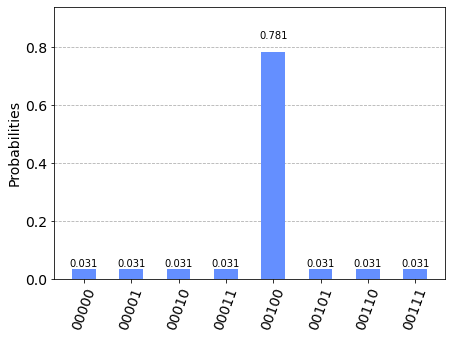

In [20]:
# Listing 13.16: Result of the search algorithm
results = execute(qc,Aer.get_backend('statevector_simulator')).result()
plot_histogram(results.get_counts())

In [23]:
# Listing 13.17: Apply the amplifier multiple times
def rounds(number_of_rounds, qc, current_passenger, group, q_pass, q_rules):
    print ("{} iterations".format(number_of_rounds))
    for i in range(0,round(number_of_rounds)):
        qc.append(oracle(current_passenger, group, q_pass, q_rules), [*q_pass, *q_rules])
        qc.append(amplifier(current_passenger, q_pass), q_pass)

In [24]:
# Listing 13.18: Search algorithm with repeated amplification
from math import pi
qc = QuantumCircuit(q_pass, q_rules)

# put passenger qubits into superposition
qc.h(q_pass)
rounds(pi*sqrt(2**QUBITS)/4, qc, current_passenger, group, q_pass, q_rules)
qc.draw()

2.221441469079183 iterations


┌───┐┌─────────┐┌────────────┐┌─────────┐┌────────────┐
passengers_0: ┤ H ├┤0        ├┤0           ├┤0        ├┤0           ├
              ├───┤│         ││            ││         ││            │
passengers_1: ┤ H ├┤1        ├┤1 amplifier ├┤1        ├┤1 amplifier ├
              ├───┤│         ││            ││         ││            │
passengers_2: ┤ H ├┤2 oracle ├┤2           ├┤2 oracle ├┤2           ├
              └───┘│         │└────────────┘│         │└────────────┘
     rules_0: ─────┤3        ├──────────────┤3        ├──────────────
                   │         │              │         │              
     rules_1: ─────┤4        ├──────────────┤4        ├──────────────
                   └─────────┘              └─────────┘

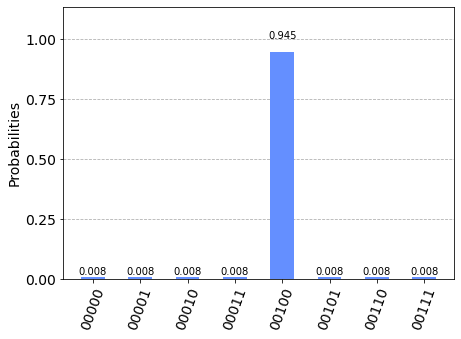

In [25]:
# Listing 13.19: Results of the repeated amplification
results = execute(qc,Aer.get_backend('statevector_simulator')).result()
plot_histogram(results.get_counts())

In [ ]:
# Listing 13.20: Running a circuit with 10 passenger‐qubits
# CAUTION: THIS CIRCUIT TAKES SOME TIME
QUBITS=10

q_pass = QuantumRegister(QUBITS, name='passengers')
q_rules = QuantumRegister(RULES, name='rules')
qc = QuantumCircuit(q_pass, q_rules)

# put passenger qubits into superposition
qc.h(q_pass)
rounds(pi*sqrt(2**QUBITS)/4, qc, current_passenger, group, q_pass, q_rules)
results = execute(qc,Aer.get_backend('statevector_simulator')).result()
"Probability of finding '100': {}".format(results.get_counts()['000000000100'])

## Section 13.2: Multiple Results

In [26]:
# Listing 13.21: Prepare the search
def prepare_group(passengerId):
    current_passenger = train[train["PassengerId"].eq(passengerId)]
    last_name = current_passenger.Name.to_string(index=False).split(',')[0]
    train[train["Name"].str.contains(last_name)]

    ticket = current_passenger["Ticket"].to_string(index=False)
    passengerId = current_passenger["PassengerId"]

    group = train[
        train["PassengerId"].ne(passengerId) & (
        train["Name"].str.contains(last_name) |
        train["Ticket"].eq(ticket)
    )]
    return (current_passenger, group)

In [27]:
# Listing 13.22: Run the search for a passenger's relatives
def find_relatives(current_passenger, group):
    q_pass = QuantumRegister(QUBITS, name='passengers')
    q_rules = QuantumRegister(RULES, name='rules')
    qc = QuantumCircuit(q_pass, q_rules)

    # put passenger qubits into superposition
    qc.h(q_pass)
    rounds(pi*sqrt(2**QUBITS)/4, qc, current_passenger, group, q_pass, q_rules)
    results = execute(qc,Aer.get_backend('statevector_simulator')).result()
    return plot_histogram(results.get_counts())

2.221441469079183 iterations


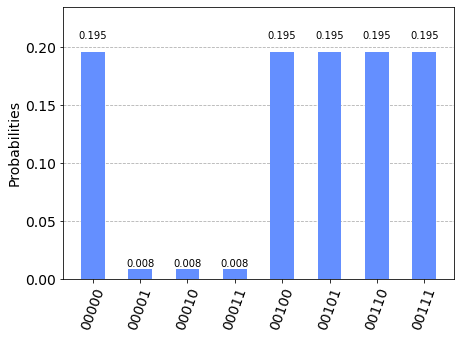

In [28]:
# Listing 13.23: Search for the relatives of Mr. William Ernest Carter
QUBITS=3
(current_passenger, group) = prepare_group(391)
find_relatives(current_passenger, group)

In [29]:
# Listing 13.24: Run the search for mutliple relatives
def find_relatives(current_passenger, group, cnt_searched):
    q_pass = QuantumRegister(QUBITS, name='passengers')
    q_rules = QuantumRegister(RULES, name='rules')
    qc = QuantumCircuit(q_pass, q_rules)

    # put passenger qubits into superposition
    qc.h(q_pass)
    rounds(pi/4*sqrt(2**QUBITS/cnt_searched), qc, current_passenger, group, q_pass, q_rules)
    results = execute(qc,Aer.get_backend('statevector_simulator')).result()
    return plot_histogram(results.get_counts())

1.282549830161864 iterations


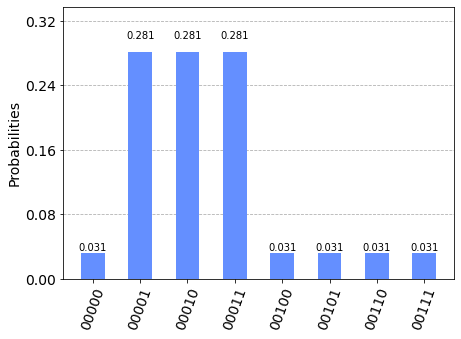

In [30]:
# Listing 13.25: Result of the search with adjusted number of iterations
find_relatives(current_passenger, group, current_passenger["SibSp"]+current_passenger["Parch"])